Importing Dependecies

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Data collection and Processing

In [5]:
#loading the data from csv file to pandas dataframe
dataset = pd.read_csv(r'D:\VS Code files\ML\Car Price\Car-Price-Prediction\car data.csv')

In [6]:
#inspecting the first 5 rows of the df
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
#checking no. of rows and columns
dataset.shape

(301, 9)

In [8]:
#getting some info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
#checking no. of missing values
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
#checking the distribution of categorial data
print(dataset.Fuel_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [11]:
print(dataset.Seller_Type.value_counts())

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


In [12]:
print(dataset.Transmission.value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the Categorial Data

converting the object cols to int cols

In [25]:
# encoding 'fuel' column
dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,  'CNG':2, 'LPG' : 3, 'Electric':4}},inplace=True)

# encoding 'seller' column
dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1,  'Trustmark Dealer':2}},inplace=True)

# encoding 'transmission' column
dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)

# encoding 'Owner' column
#dataset.replace({'owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner' : 3, 'Test Drive Car':4}},inplace=True)

C:\Users\samad\AppData\Local\Temp\ipykernel_7232\3604314707.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,  'CNG':2, 'LPG' : 3, 'Electric':4}},inplace=True)
C:\Users\samad\AppData\Local\Temp\ipykernel_7232\3604314707.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1,  'Trustmark Dealer':2}},inplace=True)
C:\Users\samad\AppData\Local\Temp\ipykernel_7232\3604314707.py:8: FutureWarning: Downcasting behavior in `replac

In [26]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


Splitting the data into training and test data

X stores features (remove sp and name from here)
Y is target -> S.P.

In [28]:
X = dataset.drop(['Car_Name','Selling_Price'],axis=1) #1 for column, 0 for row
Y = dataset['Selling_Price']

In [29]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [30]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [31]:
#train_test_split

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.1,random_state=2 )


In [32]:
print(X_train.shape, X_test.shape)

(270, 7) (31, 7)


In [33]:
print(X_train.std())

Year                 2.954527
Present_Price        8.926100
Kms_Driven       40465.642095
Fuel_Type            0.412609
Seller_Type          0.477268
Transmission         0.340566
Owner                0.254817
dtype: float64


In [34]:
print(X_test.std())

Year                 2.247101
Present_Price        5.489114
Kms_Driven       18914.327776
Fuel_Type            0.528744
Seller_Type          0.495138
Transmission         0.340777
Owner                0.179605
dtype: float64


Data Standardisation / Feature Scaling

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
#scaler = StandardScaler()

In [38]:
#scaler.fit(X_train)

In [201]:
#X_train_standardised = scaler.transform(X_train)
#print(X_train_standardised)

In [202]:
#X_test_standardised = scaler.transform(X_test)

In [203]:
#print(X_train_standardised.std())

In [204]:
#print(X_test_standardised.std())

Model Training

1. Linear Regression

In [40]:
# loading the linear regression model
lin_reg_model = LinearRegression()


In [41]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [42]:
#predicting on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [43]:
# R squared error on training data, linear reg
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)


R squared Error :  0.8799451660493707


Visualizing the actual and predicted prices

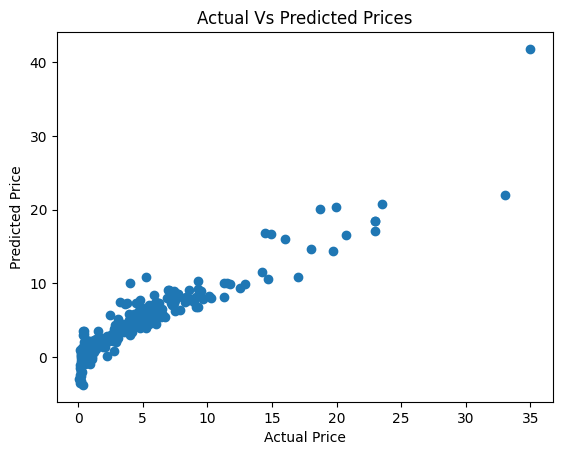

In [44]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel ("Actual Price")
plt.ylabel( "Predicted Price")
plt.title( "Actual Vs Predicted Prices")
plt.show()

the values are very close to each other which shows its a good prediction.

In [45]:
#predicting on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [46]:
# R squared error on testing data, linear reg
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)


R squared Error :  0.8365766715024996


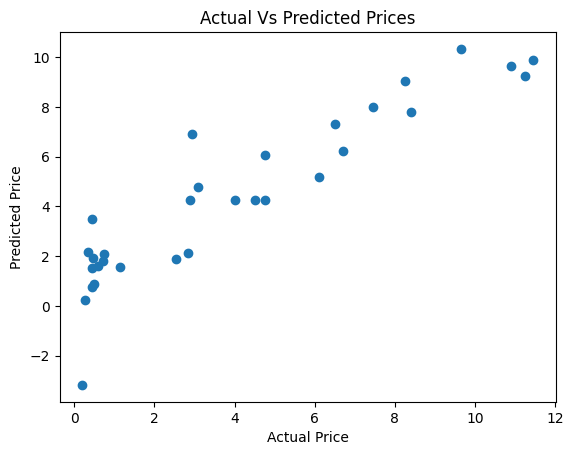

In [47]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel ("Actual Price")
plt.ylabel( "Predicted Price")
plt.title( "Actual Vs Predicted Prices")
plt.show()

2. Lasso Regression

In [52]:
# loading the lasso regression model
lass_reg_model = Lasso()

In [53]:
lass_reg_model.fit(X_train, Y_train)

Lasso()

Model Evaluation

In [54]:
#predicting on training data
training_data_predict = lass_reg_model.predict(X_train)

In [55]:
# R squared error
error_score_1= metrics.r2_score(Y_train, training_data_predict)
print("R squared Error : ", error_score_1)

R squared Error :  0.7787347070040548


Visualizing the actual and predicted prices

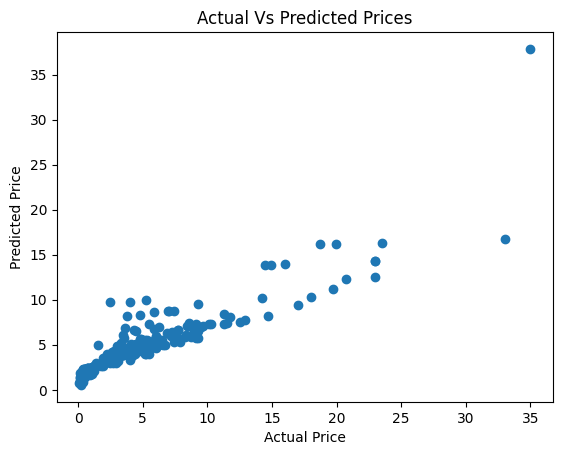

In [56]:
plt.scatter(Y_train, training_data_predict)
plt.xlabel ("Actual Price")
plt.ylabel( "Predicted Price")
plt.title( "Actual Vs Predicted Prices")
plt.show()

In [57]:
#predicting on test data
test_data_predict = lass_reg_model.predict(X_test)
# R squared error
error_score_2 = metrics.r2_score(Y_test, test_data_predict)
print("R squared Error : ", error_score_2)

R squared Error :  0.7938122750439847


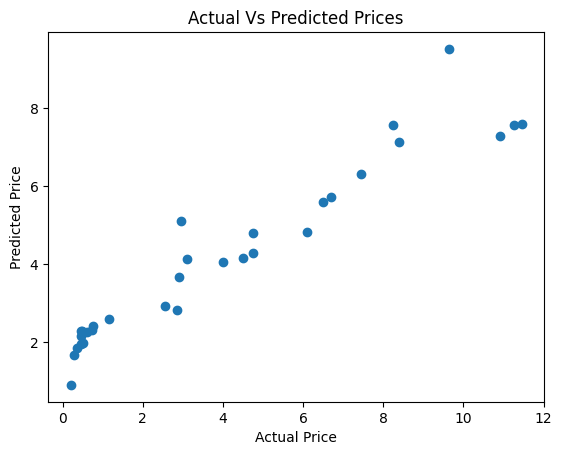

In [58]:
plt.scatter(Y_test, test_data_predict)
plt.xlabel ("Actual Price")
plt.ylabel( "Predicted Price")
plt.title( "Actual Vs Predicted Prices")
plt.show()

In [59]:
print("Linear Regression coefficients:", lin_reg_model.coef_)
print("Lasso Regression coefficients:", lass_reg_model.coef_)


Linear Regression coefficients: [ 1.20741839  3.90887854 -0.27186953  0.72611628 -0.47837293  0.51240505
 -0.22233144]
Lasso Regression coefficients: [ 0.43466103  3.49795848 -0.          0.17922615 -0.          0.
 -0.        ]
